# H1N1 and Flu Vaccine Prediction: Data Exploration

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

## Reading in Data

In [2]:
X = pd.read_csv('data/training_set_features.csv')
y = pd.read_csv('data/training_set_labels.csv')

In [3]:
data = pd.concat([X,y], axis = 1)
data = data.drop('respondent_id', axis = 1)

In [4]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## EDA

From the dataset description, we have the following features in our dataset:
<ul>
<li><code>h1n1_concern</code> - Level of concern about the H1N1 flu.<ul>
<li><code>0</code> = Not at all concerned; <code>1</code> = Not very concerned; <code>2</code> = Somewhat concerned; <code>3</code> = Very concerned.</li>
</ul>
</li>
<li><code>h1n1_knowledge</code> - Level of knowledge about H1N1 flu.<ul>
<li><code>0</code> = No knowledge; <code>1</code> = A little knowledge; <code>2</code> = A lot of knowledge.</li>
</ul>
</li>
<li><code>behavioral_antiviral_meds</code> - Has taken antiviral medications. (binary)</li>
<li><code>behavioral_avoidance</code> - Has avoided close contact with others with flu-like symptoms. (binary)</li>
<li><code>behavioral_face_mask</code> - Has bought a face mask. (binary)</li>
<li><code>behavioral_wash_hands</code> - Has frequently washed hands or used hand sanitizer. (binary)</li>
<li><code>behavioral_large_gatherings</code> - Has reduced time at large gatherings. (binary)</li>
<li><code>behavioral_outside_home</code> - Has reduced contact with people outside of own household. (binary)</li>
<li><code>behavioral_touch_face</code> - Has avoided touching eyes, nose, or mouth. (binary)</li>
<li><code>doctor_recc_h1n1</code> - H1N1 flu vaccine was recommended by doctor. (binary)</li>
<li><code>doctor_recc_seasonal</code> - Seasonal flu vaccine was recommended by doctor. (binary)</li>
<li><code>chronic_med_condition</code> - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)</li>
<li><code>child_under_6_months</code> - Has regular close contact with a child under the age of six months. (binary)</li>
<li><code>health_worker</code> - Is a healthcare worker. (binary)</li>
<li><code>health_insurance</code> - Has health insurance. (binary)</li>
<li><code>opinion_h1n1_vacc_effective</code> - Respondent's opinion about H1N1 vaccine effectiveness.<ul>
<li><code>1</code> = Not at all effective; <code>2</code> = Not very effective; <code>3</code> = Don't know; <code>4</code> = Somewhat effective; <code>5</code> = Very effective.</li>
</ul>
</li>
<li><code>opinion_h1n1_risk</code> - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.<ul>
<li><code>1</code> = Very Low; <code>2</code> = Somewhat low; <code>3</code> = Don't know; <code>4</code> = Somewhat high; <code>5</code> = Very high.</li>
</ul>
</li>
<li><code>opinion_h1n1_sick_from_vacc</code> - Respondent's worry of getting sick from taking H1N1 vaccine.<ul>
<li><code>1</code> = Not at all worried; <code>2</code> = Not very worried; <code>3</code> = Don't know; <code>4</code> = Somewhat worried; <code>5</code> = Very worried.</li>
</ul>
</li>
<li><code>opinion_seas_vacc_effective</code> - Respondent's opinion about seasonal flu vaccine effectiveness.<ul>
<li><code>1</code> = Not at all effective; <code>2</code> = Not very effective; <code>3</code> = Don't know; <code>4</code> = Somewhat effective; <code>5</code> = Very effective.</li>
</ul>
</li>
<li><code>opinion_seas_risk</code> - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.<ul>
<li><code>1</code> = Very Low; <code>2</code> = Somewhat low; <code>3</code> = Don't know; <code>4</code> = Somewhat high; <code>5</code> = Very high.</li>
</ul>
</li>
<li><code>opinion_seas_sick_from_vacc</code> - Respondent's worry of getting sick from taking seasonal flu vaccine.<ul>
<li><code>1</code> = Not at all worried; <code>2</code> = Not very worried; <code>3</code> = Don't know; <code>4</code> = Somewhat worried; <code>5</code> = Very worried.</li>
</ul>
</li>
<li><code>age_group</code> - Age group of respondent.</li>
<li><code>education</code> - Self-reported education level.</li>
<li><code>race</code> - Race of respondent.</li>
<li><code>sex</code> - Sex of respondent.</li>
<li><code>income_poverty</code> - Household annual income of respondent with respect to 2008 Census poverty thresholds.</li>
<li><code>marital_status</code> - Marital status of respondent.</li>
<li><code>rent_or_own</code> - Housing situation of respondent.</li>
<li><code>employment_status</code> - Employment status of respondent.</li>
<li><code>hhs_geo_region</code> - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.</li>
<li><code>census_msa</code> - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.</li>
<li><code>household_adults</code> - Number of <em>other</em> adults in household, top-coded to 3.</li>
<li><code>household_children</code> - Number of children in household, top-coded to 3.</li>
<li><code>employment_industry</code> - Type of industry respondent is employed in. Values are represented as short random character strings.</li>
<li><code>employment_occupation</code> - Type of occupation of respondent. Values are represented as short random character strings.</li>
</ul>

In [5]:
data.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
data.isna().sum()/len(data)

h1n1_concern                   0.003445
h1n1_knowledge                 0.004343
behavioral_antiviral_meds      0.002658
behavioral_avoidance           0.007788
behavioral_face_mask           0.000711
behavioral_wash_hands          0.001573
behavioral_large_gatherings    0.003258
behavioral_outside_home        0.003070
behavioral_touch_face          0.004793
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
health_insurance               0.459580
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
opinion_h1n1_sick_from_vacc    0.014790
opinion_seas_vacc_effective    0.017299
opinion_seas_risk              0.019246
opinion_seas_sick_from_vacc    0.020107
age_group                      0.000000
education                      0.052683
race                           0.000000
sex                            0.000000


In [7]:
data.nunique()

h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_h1n1                2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_h1n1_vacc_effective     5
opinion_h1n1_risk               5
opinion_h1n1_sick_from_vacc     5
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2
employment_status               3
hhs_geo_region

In [8]:
binary_dict = {0:'No', 1:'Yes'}
cols = data.columns
object_cols = [] # columns 
num_cols = []
for col in cols:
    if data[col].nunique() == 2 or data[col].dtype == 'object':
        object_cols.append(col)
    else:
        num_cols.append(col)
object_cols = object_cols[:-2]
data[object_cols] = data[object_cols].replace(binary_dict) # map 0 and 1s to 'No' and 'Yes' respectively
data[object_cols] = data[object_cols].fillna('missing') # fill missing as 'missing'

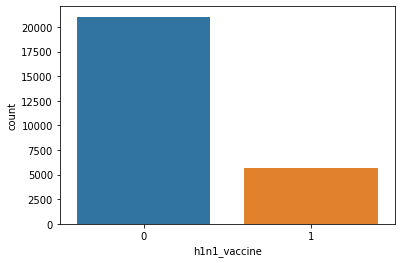

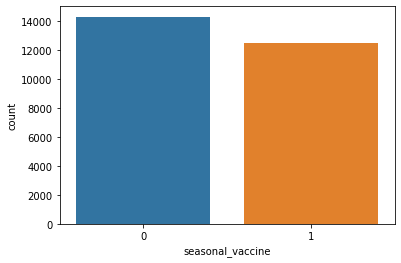

In [9]:
sns.countplot(data = data, x = 'h1n1_vaccine')
plt.show()
sns.countplot(data = data, x = 'seasonal_vaccine')
plt.show()

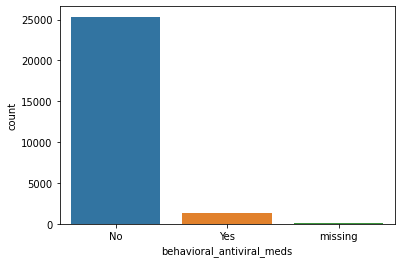

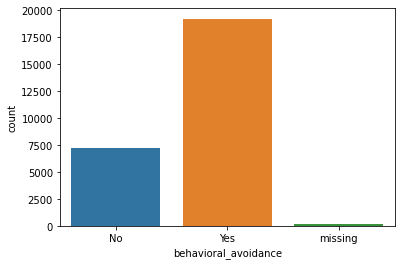

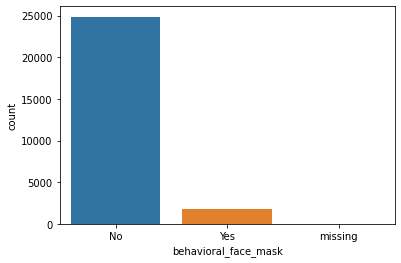

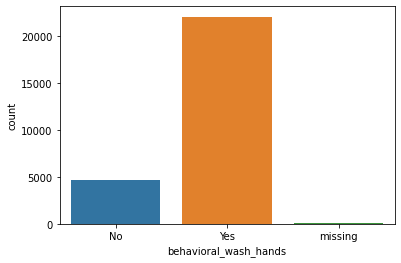

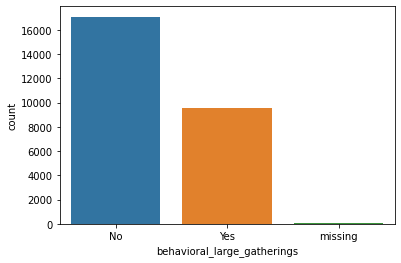

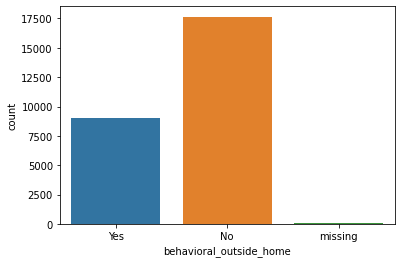

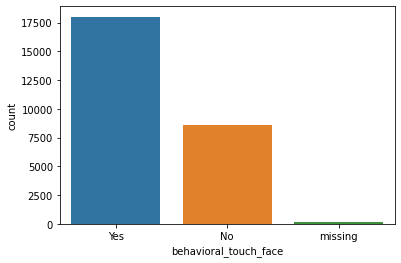

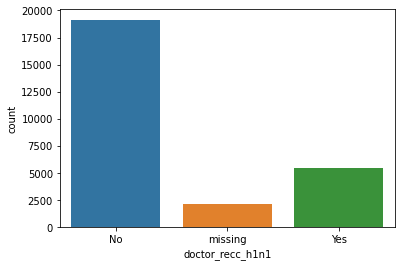

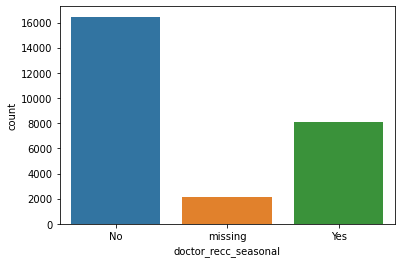

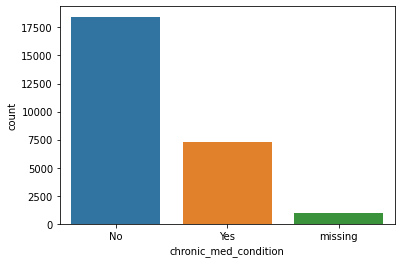

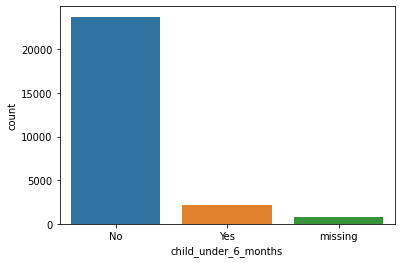

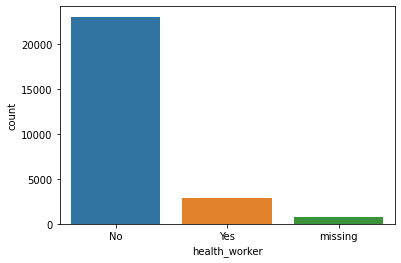

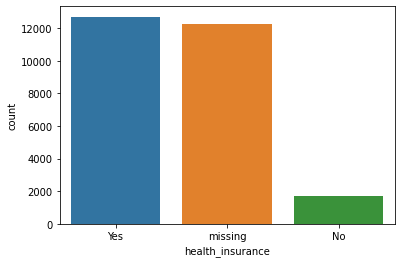

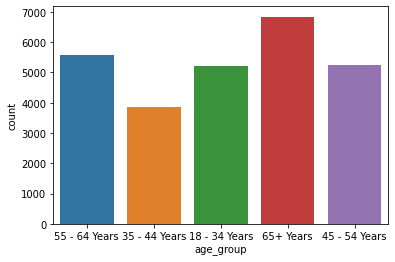

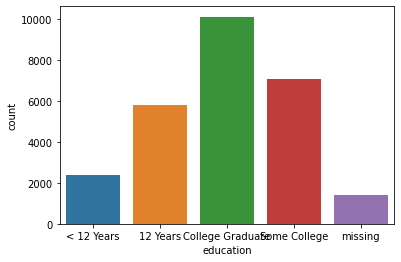

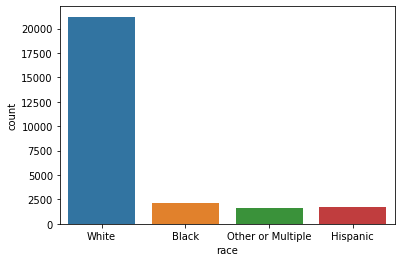

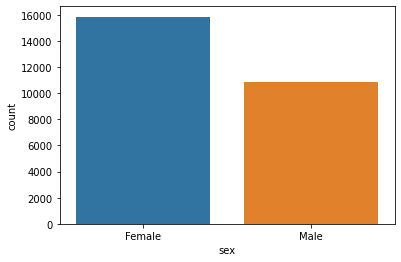

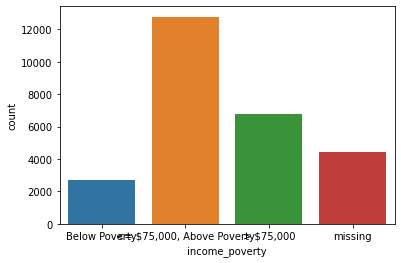

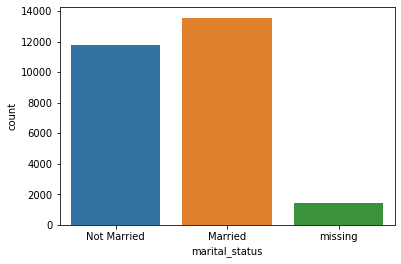

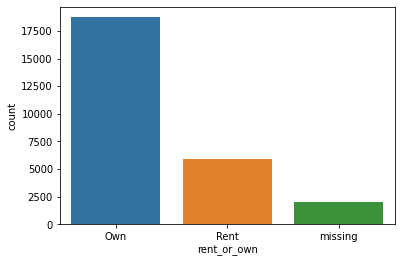

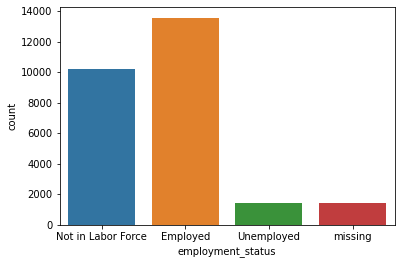

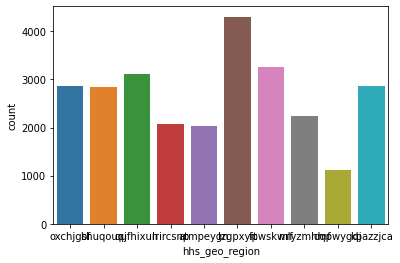

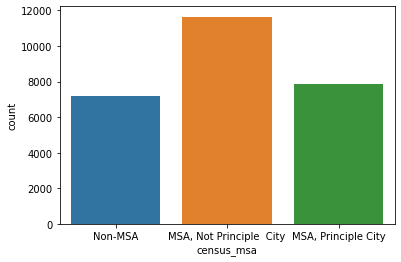

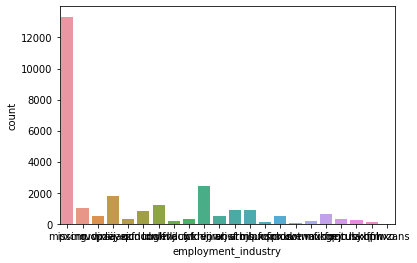

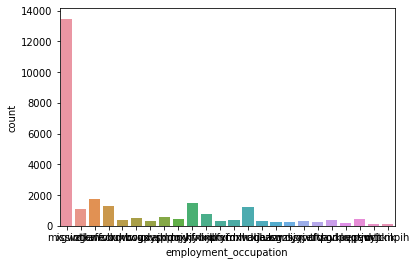

In [10]:
for col in object_cols:
    sns.countplot(data = data, x = col)
    plt.show()

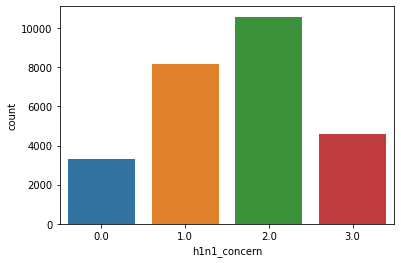

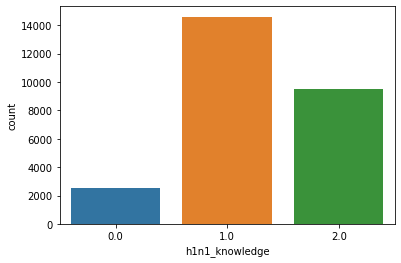

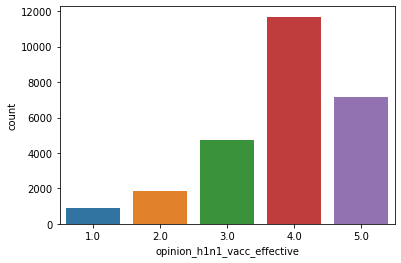

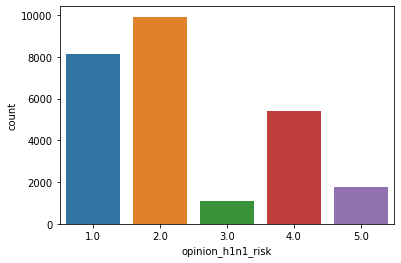

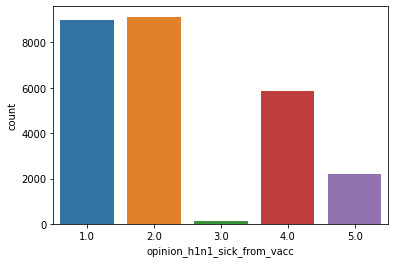

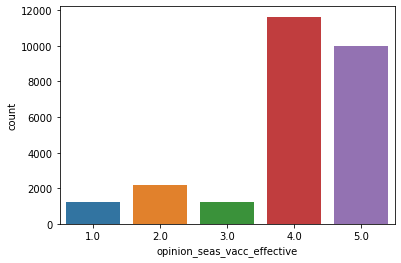

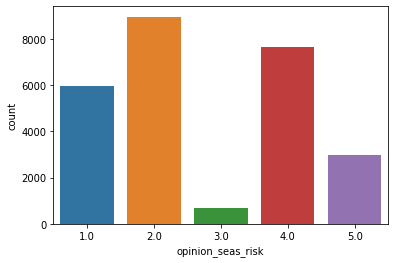

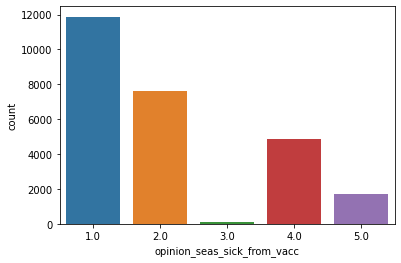

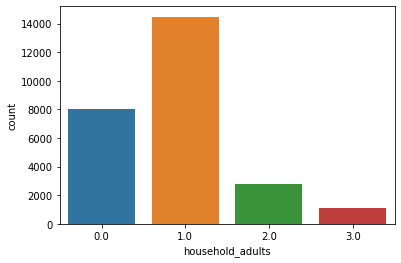

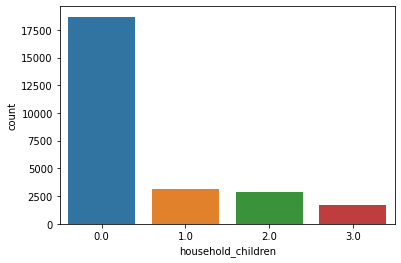

In [11]:
for col in num_cols:
    sns.countplot(data = data, x = col)
    plt.show()

In [12]:
for col in object_cols:
    display((data.groupby(col)[['h1n1_vaccine', 'seasonal_vaccine']].sum()/data.groupby(col)[['h1n1_vaccine', 'seasonal_vaccine']].count()))
    display(data[col].value_counts())

,h1n1_vaccine,seasonal_vaccine
behavioral_antiviral_meds,,
No,0.208171,0.464338
Yes,0.285165,0.478862
missing,0.408451,0.676056


No         25335
Yes         1301
missing       71
Name: behavioral_antiviral_meds, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_avoidance,,
No,0.181131,0.403521
Yes,0.224880,0.488922
missing,0.158654,0.480769


Yes        19228
No          7271
missing      208
Name: behavioral_avoidance, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_face_mask,,
No,0.204532,0.458727
Yes,0.318305,0.557306
missing,0.315789,0.578947


No         24847
Yes         1841
missing       19
Name: behavioral_face_mask, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_wash_hands,,
No,0.146022,0.343656
Yes,0.226573,0.491438
missing,0.166667,0.428571


Yes        22015
No          4650
missing       42
Name: behavioral_wash_hands, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_large_gatherings,,
No,0.207169,0.441633
Yes,0.222374,0.508222
missing,0.160920,0.494253


No         17073
Yes         9547
missing       87
Name: behavioral_large_gatherings, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_outside_home,,
No,0.206302,0.446497
Yes,0.225142,0.502951
missing,0.146341,0.487805


No         17644
Yes         8981
missing       82
Name: behavioral_outside_home, dtype: int64

,h1n1_vaccine,seasonal_vaccine
behavioral_touch_face,,
No,0.170319,0.378643
Yes,0.233043,0.506916
missing,0.140625,0.484375


Yes        18001
No          8578
missing      128
Name: behavioral_touch_face, dtype: int64

,h1n1_vaccine,seasonal_vaccine
doctor_recc_h1n1,,
No,0.136371,0.422854
Yes,0.532359,0.662167
missing,0.085648,0.352315


No         19139
Yes         5408
missing     2160
Name: doctor_recc_h1n1, dtype: int64

,h1n1_vaccine,seasonal_vaccine
doctor_recc_seasonal,,
No,0.162280,0.346259
Yes,0.348283,0.738448
missing,0.085648,0.352315


No         16453
Yes         8094
missing     2160
Name: doctor_recc_seasonal, dtype: int64

,h1n1_vaccine,seasonal_vaccine
chronic_med_condition,,
No,0.188876,0.415104
Yes,0.275446,0.603567
missing,0.187436,0.389289


No         18446
Yes         7290
missing      971
Name: chronic_med_condition, dtype: int64

,h1n1_vaccine,seasonal_vaccine
child_under_6_months,,
No,0.205272,0.466378
Yes,0.304958,0.488307
missing,0.179268,0.384146


No         23749
Yes         2138
missing      820
Name: child_under_6_months, dtype: int64

,h1n1_vaccine,seasonal_vaccine
health_worker,,
No,0.188793,0.445618
Yes,0.409452,0.647120
missing,0.179104,0.383085


No         23004
Yes         2899
missing      804
Name: health_worker, dtype: int64

,h1n1_vaccine,seasonal_vaccine
health_insurance,,
No,0.147465,0.229263
Yes,0.317713,0.538001
missing,0.112759,0.424149


Yes        12697
missing    12274
No          1736
Name: health_insurance, dtype: int64

,h1n1_vaccine,seasonal_vaccine
age_group,,
18 - 34 Years,0.190029,0.284564
35 - 44 Years,0.197765,0.362526
45 - 54 Years,0.194731,0.401298
55 - 64 Years,0.242855,0.511235
65+ Years,0.226655,0.673681


65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

,h1n1_vaccine,seasonal_vaccine
education,,
12 Years,0.184751,0.448163
< 12 Years,0.167160,0.401185
College Graduate,0.245915,0.511439
Some College,0.207866,0.451938
missing,0.185501,0.385217


College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
missing              1407
Name: education, dtype: int64

,h1n1_vaccine,seasonal_vaccine
race,,
Black,0.148725,0.349858
Hispanic,0.207977,0.339601
Other or Multiple,0.216501,0.419975
White,0.218877,0.491047


White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

,h1n1_vaccine,seasonal_vaccine
sex,,
Female,0.219448,0.497415
Male,0.202231,0.419117


Female    15858
Male      10849
Name: sex, dtype: int64

,h1n1_vaccine,seasonal_vaccine
income_poverty,,
"<= $75,000, Above Poverty",0.203412,0.476716
"> $75,000",0.253010,0.496769
Below Poverty,0.191324,0.362625
missing,0.189012,0.448338


<= $75,000, Above Poverty    12777
> $75,000                     6810
missing                       4423
Below Poverty                 2697
Name: income_poverty, dtype: int64

,h1n1_vaccine,seasonal_vaccine
marital_status,,
Married,0.233714,0.494209
Not Married,0.191587,0.441757
missing,0.181818,0.389205


Married        13555
Not Married    11744
missing         1408
Name: marital_status, dtype: int64

,h1n1_vaccine,seasonal_vaccine
rent_or_own,,
Own,0.221979,0.500747
Rent,0.188733,0.370552
missing,0.193928,0.419197


Own        18736
Rent        5929
missing     2042
Name: rent_or_own, dtype: int64

,h1n1_vaccine,seasonal_vaccine
employment_status,,
Employed,0.215560,0.421903
Not in Labor Force,0.219236,0.557912
Unemployed,0.163111,0.302134
missing,0.185236,0.387560


Employed              13560
Not in Labor Force    10231
missing                1463
Unemployed             1453
Name: employment_status, dtype: int64

,h1n1_vaccine,seasonal_vaccine
hhs_geo_region,,
atmpeygn,0.217413,0.492868
bhuqouqj,0.258609,0.496486
dqpwygqj,0.171403,0.434281
fpwskwrf,0.201531,0.474119
kbazzjca,0.198390,0.481456
lrircsnp,0.210298,0.413378
lzgpxyit,0.180126,0.453340
mlyzmhmf,0.230495,0.449398
oxchjgsf,0.230850,0.468346


lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

,h1n1_vaccine,seasonal_vaccine
census_msa,,
"MSA, Not Principle City",0.211851,0.478231
"MSA, Principle City",0.213759,0.453713
Non-MSA,0.212003,0.458183


MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

,h1n1_vaccine,seasonal_vaccine
employment_industry,,
arjwrbjb,0.238806,0.460390
atmlpfrs,0.133909,0.374730
cfqqtusy,0.144615,0.363077
dotnnunm,0.109453,0.353234
fcxhlnwr,0.397893,0.638169
haxffmxo,0.621622,0.844595
ldnlellj,0.172218,0.380991
mcubkhph,0.134545,0.301818
mfikgejo,0.162866,0.436482


missing     13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

,h1n1_vaccine,seasonal_vaccine
employment_occupation,,
bxpfxfdn,0.268882,0.453172
ccgxvspp,0.149560,0.351906
cmhcxjea,0.470730,0.688051
dcjcmpih,0.621622,0.844595
dlvbwzss,0.277533,0.422907
emcorrxb,0.236220,0.456693
haliazsg,0.364865,0.594595
hfxkjkmi,0.160574,0.428198
hodpvpew,0.250000,0.451923


missing     13470
xtkaffoo     1778
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

Looking at the proportions of those with the h1n1 vaccine and those with the seasonal vaccine across the different groups, it appears that most of our features may be helpful in predicting whether an individual has the h1n1 or seasonal vaccine. For example, looking at `behavioral_antiviral_meds`, those who have not take behavioral antiviral meds appear to have a lower h1n1 vaccination rate than those who answered "yes". Also those who did not answer have even higher vaccination rates. The difference between seasonal vaccination rates between those who answered is less significant. That being said, relatively few people answered "yes". For the most part the vaccination rates of those with some missing data differed quite a bit from other categories. For this reason it might be useful to keep missing data labeled as missing rather than imputing. 

Some features that seem especially significant are `doctor_recc_h1n1` and `doctor_recc_seasonal` which is not all that surprising. Of course those who are told by doctors to get a vaccine are more likely to. The same thing is observed with `health_worker`. Those who work in the medical industry are well informed of the benefits of vaccines. Additionally it is observed that those with chronic medical conditions are much more likely to be vaccinated (especially the seasonal one). Another interesting relationship is that of `health_insurance`. Those with health insurance are more likely to be vaccinated in both the h1n1 and seasonal case. That being said, around half of the data is missing for `health_insurance`. There are quite a few other variables that appear to be significant but there may be some correlation between these features (for example `education`, `income_poverty`, `employment_status`, and `rent_or_own` are all linked to income).

We wish to investigate whether having been vaccinated with the h1n1 or seasonal vaccine is independent from each of the categorical variables we have looked at. So we will use a chi-squared test of independence. We will conduct a chi-squared test for each of our features both with respect to the h1n1 vaccine and seasonal vaccine separately. We will conduct these tests at the 0.01 significance level.

In [48]:
for col in object_cols:
    alpha = 0.01
    table_h1n1 = pd.crosstab(data[col], data['h1n1_vaccine'])
    table_seasonal = pd.crosstab(data[col], data['seasonal_vaccine'])
    ts1, p1, df1, exp1 = chi2_contingency(table_h1n1)
    ts2, p2, df2, exp2 = chi2_contingency(table_seasonal)
    output = pd.DataFrame([[p1, ts1, p2, ts2]], columns = ['h1n1 p-value','test statistic', 'seasonal p-value','test statistic'], index = [col])
    display(output)

,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_antiviral_meds,8.515357e-14,60.18864,0.001049,13.720569


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_avoidance,1.278350e-14,63.981243,2.377481e-34,154.843703


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_face_mask,8.751663e-30,133.816618,1.781160e-15,67.923024


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_wash_hands,3.604048e-33,149.406501,5.991576e-74,337.201885


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_large_gatherings,0.00728,9.845262,1.748420e-24,109.406659


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_outside_home,0.000619,14.773712,2.578340e-17,76.393602


,h1n1 p-value,test statistic,seasonal p-value,test statistic
behavioral_touch_face,2.991249e-31,140.568894,3.440696e-84,384.362948


,h1n1 p-value,test statistic,seasonal p-value,test statistic
doctor_recc_h1n1,0.0,4177.537105,8.442726e-238,1091.763894


,h1n1 p-value,test statistic,seasonal p-value,test statistic
doctor_recc_seasonal,2.329640e-293,1347.623437,0.0,3474.902795


,h1n1 p-value,test statistic,seasonal p-value,test statistic
chronic_med_condition,2.295878e-52,237.806619,8.229850e-168,769.453056


,h1n1 p-value,test statistic,seasonal p-value,test statistic
child_under_6_months,3.124194e-27,122.061243,0.000002,26.353328


,h1n1 p-value,test statistic,seasonal p-value,test statistic
health_worker,1.304164e-164,754.716787,6.988565e-97,442.812958


,h1n1 p-value,test statistic,seasonal p-value,test statistic
health_insurance,0.0,1613.706453,7.704454e-162,741.953973


,h1n1 p-value,test statistic,seasonal p-value,test statistic
age_group,2.971603e-14,69.445762,0.0,2175.607572


,h1n1 p-value,test statistic,seasonal p-value,test statistic
education,3.664435e-27,130.123425,1.784114e-36,173.578157


,h1n1 p-value,test statistic,seasonal p-value,test statistic
race,2.555777e-12,57.011196,1.378102e-63,294.72552


,h1n1 p-value,test statistic,seasonal p-value,test statistic
sex,0.000771,11.309981,2.524808e-36,158.404629


,h1n1 p-value,test statistic,seasonal p-value,test statistic
income_poverty,1.928282e-20,94.912264,5.455880e-33,153.170127


,h1n1 p-value,test statistic,seasonal p-value,test statistic
marital_status,4.973987e-17,75.07945,2.089329e-23,104.445228


,h1n1 p-value,test statistic,seasonal p-value,test statistic
rent_or_own,3.586457e-08,34.287032,1.649862e-71,325.965699


,h1n1 p-value,test statistic,seasonal p-value,test statistic
employment_status,7.656468e-07,31.215669,9.205539e-140,646.306995


,h1n1 p-value,test statistic,seasonal p-value,test statistic
hhs_geo_region,5.188916e-16,92.47232,2.692066e-08,53.188389


,h1n1 p-value,test statistic,seasonal p-value,test statistic
census_msa,0.944542,0.11411,0.001157,13.524092


,h1n1 p-value,test statistic,seasonal p-value,test statistic
employment_industry,8.979656e-178,903.644001,1.940016e-222,1113.292166


,h1n1 p-value,test statistic,seasonal p-value,test statistic
employment_occupation,2.371401e-174,895.218345,3.574346e-195,993.284539


The only feature that stands our is `census_msa`. For our test with respect to h1n1 vaccinations, we have a very large p-value of 0.944 and a test statistic of only 0.114 indicating that it is quite likely that h1n1 vaccinations are independent from the metropolitan area people reside (as dOur tests are unable to rule out any other features as independent from `seasonal_vaccine` or `h1n1_vaccine`. 

In [14]:
num_filled = pd.concat([data[num_cols].fillna('missing'),y], axis = 1)

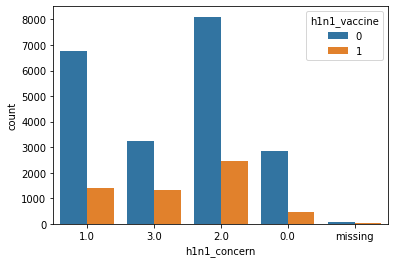

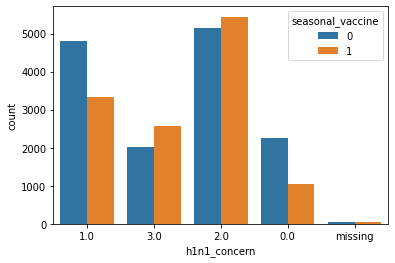

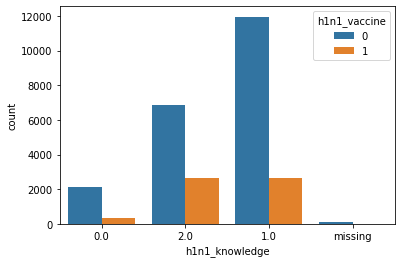

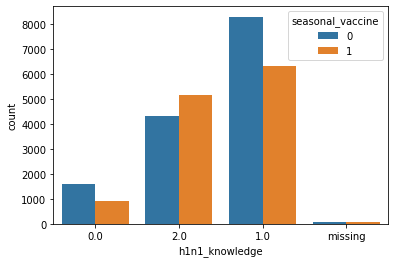

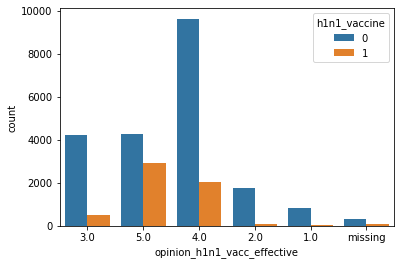

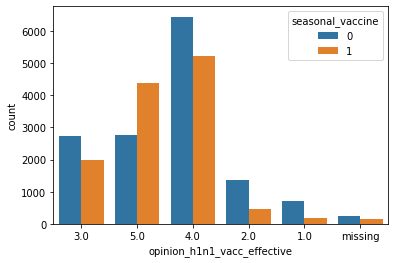

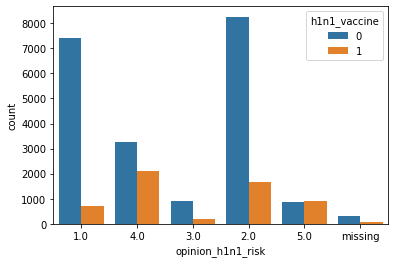

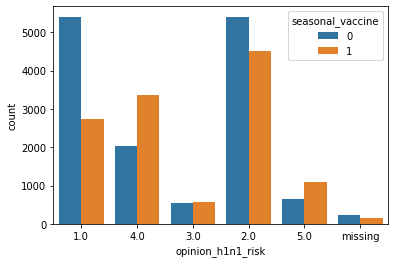

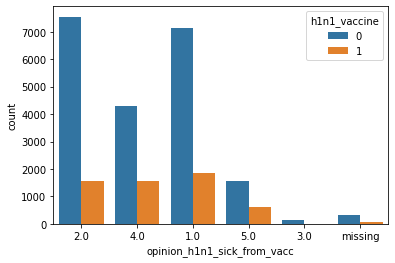

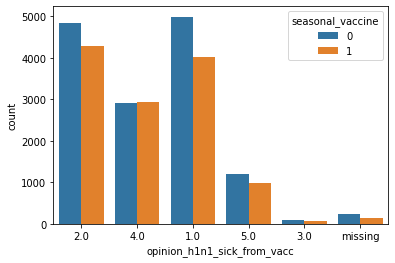

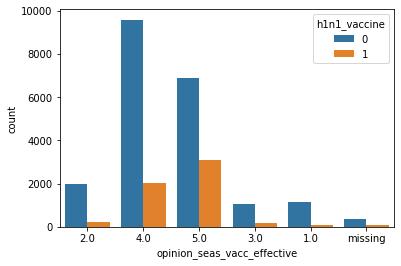

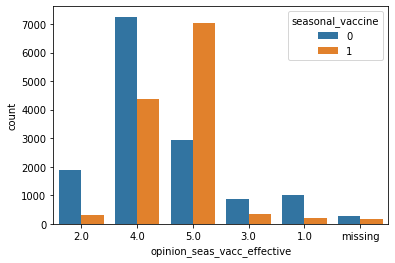

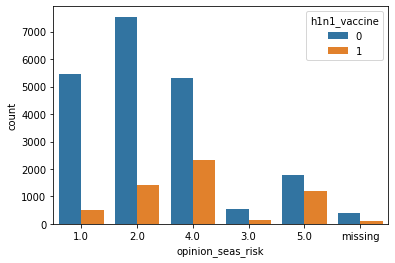

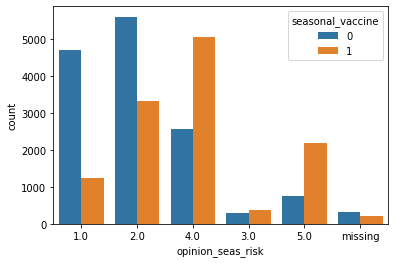

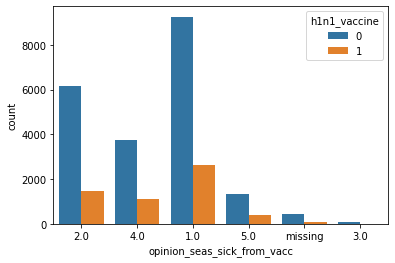

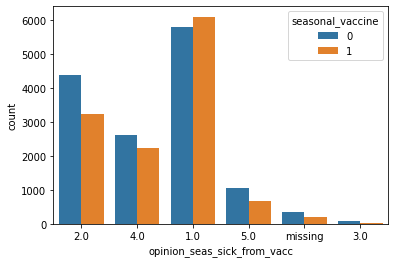

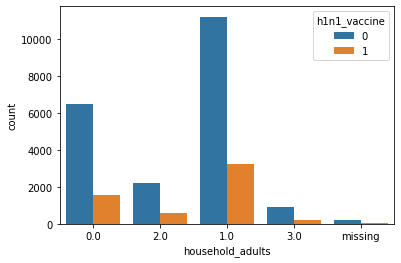

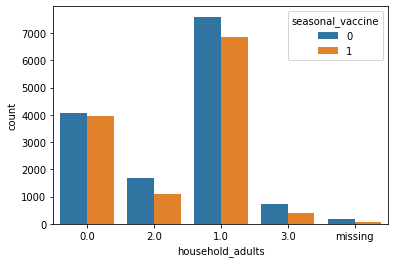

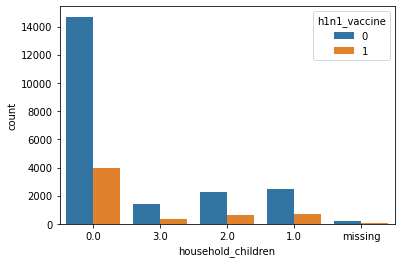

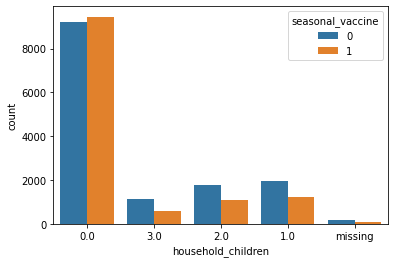

In [15]:
for col in num_cols:
    sns.countplot(data = num_filled, x = col, hue = 'h1n1_vaccine')
    plt.show()
    sns.countplot(data = num_filled, x = col, hue = 'seasonal_vaccine')
    plt.show()

In [16]:
for col in num_cols:
    display((num_filled.groupby(col)[['h1n1_vaccine', 'seasonal_vaccine']].sum()/num_filled.groupby(col)[['h1n1_vaccine', 'seasonal_vaccine']].count()))
    display(num_filled[col].value_counts())

,h1n1_vaccine,seasonal_vaccine
h1n1_concern,,
0.0,0.135619,0.316141
1.0,0.171348,0.409910
2.0,0.233853,0.514421
3.0,0.292093,0.559573
missing,0.173913,0.456522


2.0        10575
1.0         8153
3.0         4591
0.0         3296
missing       92
Name: h1n1_concern, dtype: int64

,h1n1_vaccine,seasonal_vaccine
h1n1_knowledge,,
0.0,0.144054,0.366321
1.0,0.181737,0.432114
2.0,0.278065,0.543164
missing,0.189655,0.482759


1.0        14598
2.0         9487
0.0         2506
missing      116
Name: h1n1_knowledge, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_h1n1_vacc_effective,,
1.0,0.047404,0.211061
2.0,0.051130,0.256728
3.0,0.105653,0.422613
4.0,0.176410,0.448429
5.0,0.404828,0.612336
missing,0.194373,0.378517


4.0        11683
5.0         7166
3.0         4723
2.0         1858
1.0          886
missing      391
Name: opinion_h1n1_vacc_effective, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_h1n1_risk,,
1.0,0.088340,0.335668
2.0,0.167960,0.455389
3.0,0.173679,0.516562
4.0,0.392102,0.623841
5.0,0.510857,0.626857
missing,0.221649,0.378866


2.0        9919
1.0        8139
4.0        5394
5.0        1750
3.0        1117
missing     388
Name: opinion_h1n1_risk, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_h1n1_sick_from_vacc,,
1.0,0.204601,0.445877
2.0,0.173184,0.470150
3.0,0.081081,0.418919
4.0,0.264274,0.501880
5.0,0.280293,0.451760
missing,0.205063,0.367089


2.0        9129
1.0        8998
4.0        5850
5.0        2187
missing     395
3.0         148
Name: opinion_h1n1_sick_from_vacc, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_seas_vacc_effective,,
1.0,0.072891,0.158067
2.0,0.092928,0.145512
3.0,0.133224,0.279605
4.0,0.176283,0.376301
5.0,0.308433,0.704703
missing,0.199134,0.383117


4.0        11629
5.0         9973
2.0         2206
1.0         1221
3.0         1216
missing      462
Name: opinion_seas_vacc_effective, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_seas_risk,,
1.0,0.084700,0.209407
2.0,0.157807,0.373129
3.0,0.200886,0.556869
4.0,0.306029,0.663434
5.0,0.399594,0.744760
missing,0.198444,0.391051


2.0        8954
4.0        7630
1.0        5974
5.0        2958
3.0         677
missing     514
Name: opinion_seas_risk, dtype: int64

,h1n1_vaccine,seasonal_vaccine
opinion_seas_sick_from_vacc,,
1.0,0.220556,0.512890
2.0,0.189965,0.424735
3.0,0.085106,0.180851
4.0,0.229184,0.459604
5.0,0.225450,0.384660
missing,0.182495,0.364991


1.0        11870
2.0         7633
4.0         4852
5.0         1721
missing      537
3.0           94
Name: opinion_seas_sick_from_vacc, dtype: int64

,h1n1_vaccine,seasonal_vaccine
household_adults,,
0.0,0.196748,0.493669
1.0,0.225577,0.474921
2.0,0.200856,0.396718
3.0,0.197333,0.362667
missing,0.156627,0.257028


1.0        14474
0.0         8056
2.0         2803
3.0         1125
missing      249
Name: household_adults, dtype: int64

,h1n1_vaccine,seasonal_vaccine
household_children,,
0.0,0.213314,0.506373
1.0,0.212283,0.384882
2.0,0.219623,0.382332
3.0,0.199771,0.342873
missing,0.156627,0.257028


0.0        18672
1.0         3175
2.0         2864
3.0         1747
missing      249
Name: household_children, dtype: int64

All of the variables pertaining to opinions on the h1n1 disease and vaccination seem to be important in determining both h1n1 and seasonal vaccine rates. But number of children or adults in the household does not seem to be that important, especially for h1n1 vaccination rates. Also note that the number of missing values across these classes is relatively small so we will probably impute those.